# Student Performance Prediction using Supervised Learning

## Predict a student’s exam performance based on:
    Study habits
    Demographics
    Family background

This is a regression problem (scores) and can also be converted into classification (Pass / Fail).

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### 2. Load Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### 3. Basic EDA

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


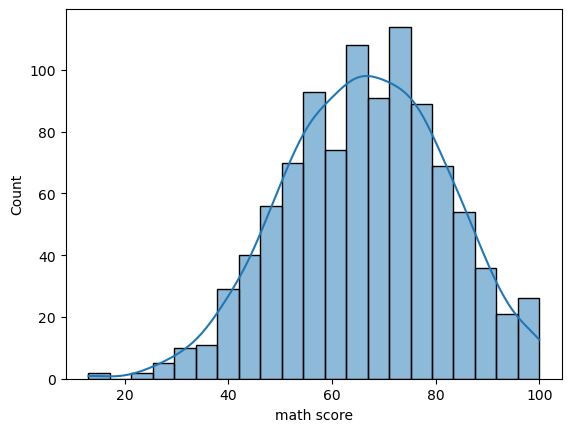

In [4]:
sns.histplot(df['math score'], kde = True)
plt.show()

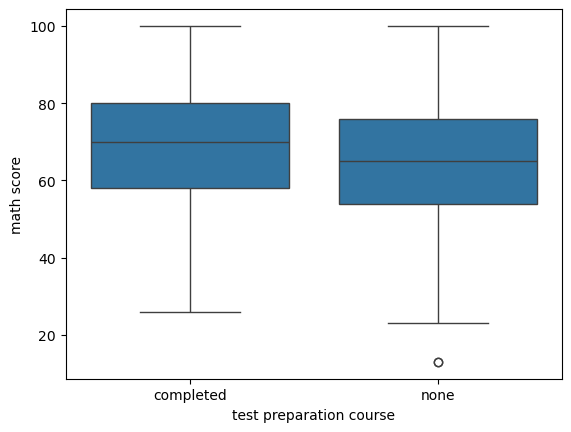

In [5]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.show()

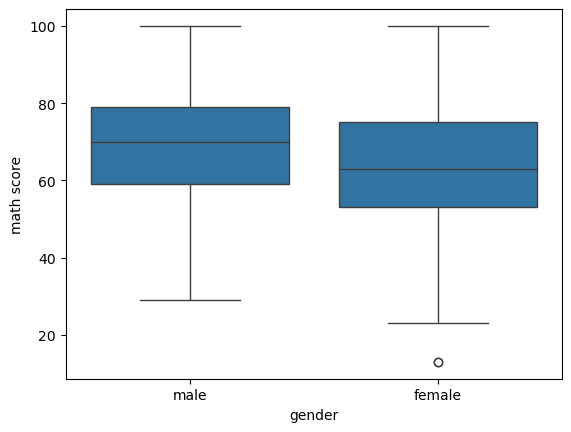

In [6]:
sns.boxplot(x='gender', y='math score', data=df)
plt.show()

### 4. Separate Features & Target

In [7]:
X = df.drop('math score', axis=1)
y = df['math score']

### 5. Preprocessing (Categorical Encoding)

In [8]:
categorical_features = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['reading score', 'writing score']),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

### 6. Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 7. Build Pipeline + Train Model

In [10]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

### 8. Evaluation

In [11]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4.561765032371565
RMSE: 5.5028826969081095
R2 Score: 0.87062289224987
